In [ ]:
%matplotlib inline

This code is licensed under a
Creative Commons Attribution-Share-Alike license.
You can change it, transmit it, show it to other people.
Just always give credit to RFvdW.

It is an adapted version
of code written by Thomas Countz (2018)
under a MIT license.

It is part of an introductory course in AI
Lesson01 The PERCEPTRON

If you searched for Neural Networks, Deep Learning, Machine Learning,
or anything that has to do with Artificial Intelligence,
you’ve probably heard about the Perceptron.
The1958’s famous algorithm created by Frank Rosenblatt
is the landing mark in Neural Networks and consequently
Deep Learning, and understanding the way it works
(i.e., the math behind it) is essential to go a step further
to more complex IA models, specifically in Neural Networks.


http://creativecommons.org/licenses/by-nc-sa/3.0/

In [1]:

import numpy as np
import matplotlib.pyplot as plt

class Perceptron(object):

    def __init__(self, no_of_inputs, no_of_training_epochs=20, learning_rate=0.01):
        self.no_of_training_epochs = no_of_training_epochs
        self.learning_rate = learning_rate
        self.weights = np.random.normal(0, 10, no_of_inputs + 1)
        self.bias = self.weights[0]
        self.epoch_list=[]
        self.error_history=[]


    def step_function(self, inputs):
        netto_summation = np.dot(inputs, self.weights[1:]) + self.bias
        if netto_summation > 0:
          activation = 1
        else:
          activation = 0
        return activation

    def train(self, training_inputs, teacher_labels):
        epoch =0;
        i =0;
        for _ in range(self.no_of_training_epochs):
          epoch+=1
          for inputs, teacher in zip(training_inputs, teacher_labels):
              activated_perceptron_output = self.step_function(inputs)
              error = (teacher - activated_perceptron_output)
              self.weights[1:] += self.learning_rate * (error) * inputs
              self.bias += self.learning_rate  * error
              #print(teacher, activated_perceptron_output)
              i+=1
              self.epoch_list.append(epoch)
              self.error_history.append(np.sum(np.abs(error)))

########################################
########################################
########################################
########################################

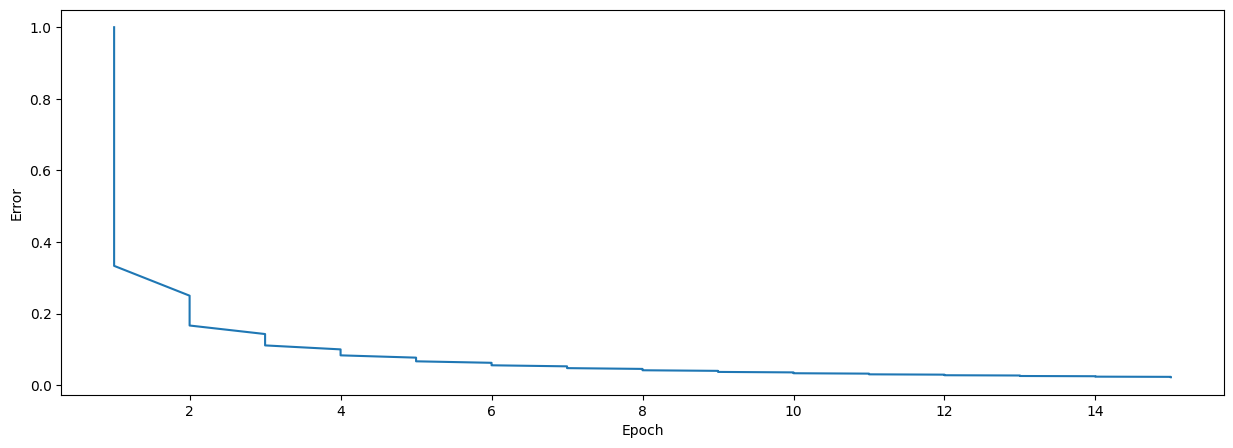

In [2]:
training_inputs = []
training_inputs.append(np.array([1, 1]))
training_inputs.append(np.array([1, 0]))
training_inputs.append(np.array([0, 1]))
training_inputs.append(np.array([0, 0]))

teacher = np.array([1, 0, 0, 0])


NN=perceptron = Perceptron(2,15,0.1)
NN.train(training_inputs, teacher)


plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, 1/np.cumsum(NN.error_history))
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()